# Regras de Associação

Adaptado de https://www.kaggle.com/code/mervetorkan/association-rules-with-python/notebook


A Análise de Regras de Associação tornou-se familiar para análise no setor de varejo. 

Também é chamado de termos de Análise de Cesta de Mercado (Market Basket Analysis). 

Esta análise também é usada para aconselhamento. 

Recomendações pessoais em aplicativos como Spotify, Netflix e Youtube podem ser dadas como exemplos. 



Um dos maiores exemplos de Análise de Regras de Associação é a correlação entre cerveja e fralda. 
* Quando o Walmart, uma rede de lojas dos Estados Unidos, estudou o comportamento de compra dos clientes, o estudo mostrou que fraldas e cervejas são compradas juntas. 
* Porque, como se vê, os pais geralmente são encarregados de fazer compras enquanto as mães ficam com o bebê.

{homem, fralda} => {cerveja} 

# Apriori Algorithm

O Algoritmo Apriori, usado para a primeira fase das Regras de Associação, é o algoritmo mais popular e clássico nas partes antigas frequentes. 

Essas propriedades e dados do algoritmo são avaliados com regras de associação booleanas. 

Nesse algoritmo, existem grupos de produtos que aparecem com frequência e, então, são buscadas relações fortes entre esses produtos e outros produtos.

A importância de uma Regra de Associação pode ser determinada por 3 parâmetros que são usados para identificar a força do algoritmo. Nomeadamente,

* Suporte (Support)
* Confiança (Confidence)
* Sustentação (Lift)

Seja X e Y os produtos no mercado e N o número total de produtos. 

X é o antecedente e Y o consequente

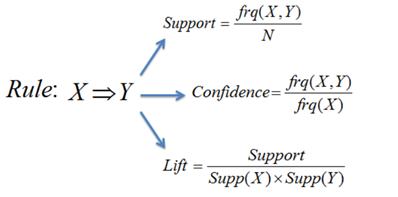

Suporte: É a probabilidade de um evento ocorrer.

Confiança: É uma medida de probabilidade condicional

Sustentação: É a probabilidade de todos os itens ocorrerem juntos dividido pelo produto do antecedente e consequente ocorrerem como se fossem independentes um do outro.

# Carregamento dos dados

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

Baixar o arquivo de https://www.kaggle.com/datasets/shazadudwadia/supermarket


In [ ]:
df = pd.read_csv('/content/GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.shape

(20, 1)

In [ ]:
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [ ]:
data = list(df["products"].apply(lambda x:x.split(",") ))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [ ]:
len(data)

20

# Algoritmo Apriori e Codificação One-Hot


O algoritmo de Apriori processa valores True/False ou 1/0. Precisamos preprocessar nossos dados para isso.

Usando TransactionEncoder, convertemos a lista em uma lista booleana One-Hot Codificada.

Os produtos que os clientes compraram ou não compraram durante as compras agora serão representados pelos valores 1 e 0.

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
tEncoder = TransactionEncoder()
a_data = tEncoder.fit(data).transform(data)


In [ ]:
a_data

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True],
       [ True, False,  True, False, False, False, False,  True, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True, False,
        False,  True],
       [False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False, False,  True,  True,  True, False, Fal

In [ ]:
df = pd.DataFrame(a_data, columns=tEncoder.columns_)


In [ ]:
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [ ]:
df = df.replace({False: 0, True: 1})
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


# Aplicando Apriori e extraindo Regras de Associação



O próximo passo é criar o Modelo Apriori. Podemos alterar todos os parâmetros do Modelo Apriori no pacote mlxtend.

Vou usar parâmetros mínimos de suporte para essa modelagem.

Para isso, definimos um valor min_support com um valor limite de 20% e imprimi-os na tela também.

In [ ]:
df_apriori = apriori(df, 0.2, use_colnames = True)

In [ ]:
df_apriori

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


In [ ]:
df_ar = association_rules(df_apriori, metric="confidence", min_threshold=0.6)

In [ ]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


Se examinarmos o índice 1:

* A probabilidade de ver vendas de açúcar é de 30%.
* A compra de pão é vista como 65%.
* Podemos dizer que o suporte de ambos é medido em 20%.
* A confiança indica que 67% de quem compra açúcar, compra pão também.
* Os usuários que compram açúcar provavelmente consumirão 3% mais pão do que os usuários que não compram açúcar.

Como resultado, se os itens X e Y forem comprados juntos com mais frequência, várias etapas podem ser tomadas para aumentar o lucro. Por exemplo:
* A venda cruzada pode ser melhorada combinando produtos - itens
* O layout da loja pode ser alterado para que as vendas possam ser melhoradas quando certos itens são mantidos juntos.
* As atividades promocionais que são uma campanha publicitária podem ser realizadas para aumentar as vendas de mercadorias que os clientes não compram.
* Descontos coletivos podem ser oferecidos nesses produtos se o cliente comprar os dois.

## Atividade

Experimentar valores de limites diferentes nos algoritmos.

# Exemplo de sistema de recomendação de filmes

https://www.kaggle.com/code/ankits29/movie-recommendation-with-ml-apriori-explained/notebook

# Exercício:

Analisar regras de associação no dataset
https://www.kaggle.com/datasets/parisanahmadi/market-basket-optimisation

Procurar por regras com confiança mínima de 20%. O suporte mínimo deve ser explorado.